In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import boston_housing

(x_train_set, y_train_set), (x_test, y_test) = boston_housing.load_data()

In [3]:
x_train_set.shape, y_train_set.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(
  x_train_set, y_train_set, random_state=1)

In [5]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()

x_train = scal.fit_transform(x_train)

x_valid = scal.transform(x_valid)
x_test = scal.transform(x_test)

In [6]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

In [7]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_shape=x_train.shape[1:]))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,501
Trainable params: 6,501
Non-trainable params: 0
_________________________________________________________________


In [9]:
weights, biases = model.layers[1].get_weights()

In [10]:
biases.shape, biases

((50,),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32))

In [11]:
weights.shape, weights

((100, 50),
 array([[-1.7570877e-01,  8.1402734e-02, -1.4826283e-01, ...,
         -1.7614923e-01,  5.6872264e-02, -7.6071791e-02],
        [-1.3829151e-01, -5.4833129e-02,  3.6174923e-02, ...,
         -1.6717239e-01, -9.8129749e-02,  5.8174953e-02],
        [-1.6167760e-05, -1.7889757e-01, -4.3867156e-02, ...,
          5.5394992e-02,  6.8313494e-02,  1.6976263e-01],
        ...,
        [-1.9529200e-01, -1.0802656e-01, -1.5956549e-01, ...,
         -1.8443738e-01, -8.9457229e-02, -1.8359251e-01],
        [-1.4680529e-01,  9.6274987e-02, -1.4093816e-03, ...,
         -1.5335560e-02, -1.5325160e-01, -1.0957737e-01],
        [-9.5625371e-03, -3.4327418e-02, -1.3489552e-01, ...,
          1.8860336e-01,  2.2651255e-03,  1.4622211e-02]], dtype=float32))

In [12]:
model.compile(loss='mse',
      optimizer=SGD(learning_rate=1e-3))

In [13]:
train = model.fit(x_train, y_train,
                 epochs=20,
                 validation_data=(x_valid, y_valid))

Epoch 1/20
10/10 [==============================] - 1s 28ms/step - loss: 512.7304 - val_loss: 324.9708
Epoch 2/20
10/10 [==============================] - 0s 5ms/step - loss: 164.9336 - val_loss: 66.6260
Epoch 3/20
10/10 [==============================] - 0s 4ms/step - loss: 44.1430 - val_loss: 37.2347
Epoch 4/20
10/10 [==============================] - 0s 4ms/step - loss: 28.0593 - val_loss: 28.8904
Epoch 5/20
10/10 [==============================] - 0s 4ms/step - loss: 22.4263 - val_loss: 23.5845
Epoch 6/20
10/10 [==============================] - 0s 4ms/step - loss: 19.8097 - val_loss: 21.3290
Epoch 7/20
10/10 [==============================] - 0s 6ms/step - loss: 18.2146 - val_loss: 19.3756
Epoch 8/20
10/10 [==============================] - 0s 5ms/step - loss: 16.9888 - val_loss: 18.1144
Epoch 9/20
10/10 [==============================] - 0s 5ms/step - loss: 15.8634 - val_loss: 16.7946
Epoch 10/20
10/10 [==============================] - 0s 5ms/step - loss: 14.7164 - val_loss: 15.

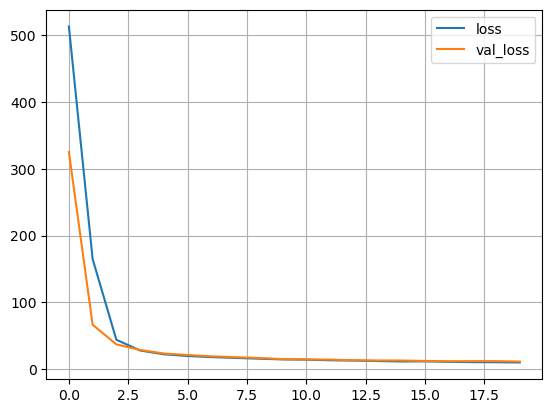

In [14]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()

In [15]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 21.0118


21.011838912963867

In [16]:
model.predict(x_test[:3])

1/1 [==============================] - 0s 78ms/step


array([[ 8.63211 ],
       [16.067991],
       [21.471321]], dtype=float32)

In [17]:
y_test[:3]

array([ 7.2, 18.8, 19. ])